# Pocket Articles Reading Data Analysis

Data Analysis and Data Visualization of Articles Read in Pocket!

NOTE: To use, first run [pocket_downloader.ipynb](https://github.com/markwk/qs_ledger/blob/master/pocket/pocket_downloader.ipynb) to download your article data.

-----

## Dependencies

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

----

## Get Our Data

In [2]:
# unread articles
articles_unread = pd.read_csv('data/pocket_unread_articles.csv')

In [3]:
# articles read
articles_read = pd.read_csv(open('data/pocket_read_articles.csv'), encoding='utf-8', engine='c')

# drop any faulty imported
articles_read = articles_read.dropna(axis=0, subset=['time_read'])

In [4]:
articles = pd.concat([articles_read, articles_unread], sort=False)

In [5]:
print("===== Pocket Stats =====")
print('{:,} total articles'.format(len(articles)))
print('{:,} total articles read'.format(len(articles_read)))
print('{:,} total articles unread'.format(len(articles_unread)))

===== Pocket Stats =====
6,557 total articles
6,080 total articles read
477 total articles unread


----

## All Articles: Data Analysis

In [6]:
# convert with pd.to_datetime
articles['time_added'] = pd.to_datetime(articles['time_added'])
articles['time_updated'] = pd.to_datetime(articles['time_updated'])
articles.loc[articles['time_favorited'] == 'nan','time_favorited'] = np.nan
articles['time_favorited'] = pd.to_datetime(articles['time_favorited'])
articles.loc[articles['time_read'] == 'nan','time_read'] = np.nan
articles['time_read'] = pd.to_datetime(articles['time_read']) 

In [7]:
# date additions of time_added
articles['time_added_date'] = articles['time_added'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
articles['year'] = articles['time_read'].dt.year
articles['month'] = articles['time_read'].dt.month
articles['mnth_yr'] = articles['time_read'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
articles['day'] = articles['time_read'].dt.day
articles['dow'] = articles['time_read'].dt.weekday
articles['hour'] = articles['time_read'].dt.hour

In [8]:
articles_added_per_day = articles['time_added_date'].value_counts().sort_index()
articles_added_per_day.columns = ['Date', 'Count']
articles_added_per_day = pd.DataFrame(articles_added_per_day)
articles_added_per_day['Date'] = articles_added_per_day.index.values
articles_added_per_day.columns = ['Count', 'Date']
articles_added_per_day = articles_added_per_day[['Date', 'Count']]
articles_added_per_day['Date'] = pd.to_datetime(articles_added_per_day['Date'])

In [9]:
# Generage Range of Dates from First Article added to Today
first_article_date = articles_added_per_day.head(1).index.values[0]
last_article_date = articles_added_per_day.tail(1).index.values[0]
# today = dt.today().strftime('%Y-%m-%d')
all_dates = pd.date_range(start=first_article_date, end=last_article_date)
all_dates = pd.DataFrame(all_dates, columns=['Date'])

In [10]:
# combine actual counts with total dates possible
articles_added_dates = pd.merge(left=all_dates, right=articles_added_per_day, left_on="Date", right_on="Date", how="outer")
articles_added_dates['Count'].fillna(0, inplace=True)
# article_dates.tail()
# len(articles_added_dates)

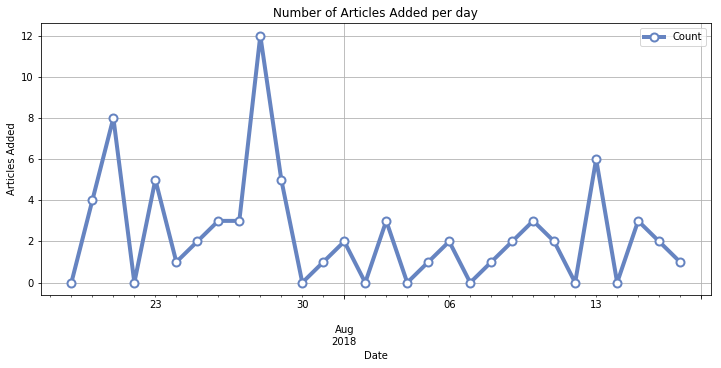

In [11]:
# a bit of a hackish solution, could use improvement
dataset = articles_added_dates.tail(30)
chart_title = 'Number of Articles Added per day'

# n_groups = len(dataset)
# index = np.arange(n_groups)

ax = dataset.plot(
    x="Date", y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
# ax.set_xticks()
ax.set_ylabel('Articles Added')
# ax.set_xlabel('')
# plt.xticks(index, dataset.Date, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Articles Unread: Data Processing

In [12]:
# convert with pd.to_datetime
articles_unread['time_added'] = pd.to_datetime(articles_unread['time_added'])
articles_unread['time_updated'] = pd.to_datetime(articles_unread['time_updated'])
articles_unread.loc[articles_unread['time_favorited'] == 'nan','time_favorited'] = np.nan
articles_unread['time_favorited'] = pd.to_datetime(articles_unread['time_favorited'])
# articles_unread['time_read'] = pd.to_datetime(articles_read['time_read']) # no need to convert since it's empty

-----

## Articles Read: Data Processsing

In [13]:
# convert with pd.to_datetime
articles_read['time_added'] = pd.to_datetime(articles_read['time_added'])
articles_read['time_updated'] = pd.to_datetime(articles_read['time_updated'])
articles_read.loc[articles_read['time_favorited'] == 'nan','time_favorited'] = np.nan
articles_read['time_favorited'] = pd.to_datetime(articles_read['time_favorited'])
articles_read['time_read'] = pd.to_datetime(articles_read['time_read']) 

In [14]:
# date additions of time_read
articles_read['time_read_date'] = articles_read['time_read'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
articles_read['year'] = articles_read['time_read'].dt.year
articles_read['month'] = articles_read['time_read'].dt.month
articles_read['mnth_yr'] = articles_read['time_read'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
articles_read['day'] = articles_read['time_read'].dt.day
articles_read['dow'] = articles_read['time_read'].dt.weekday
articles_read['hour'] = articles_read['time_read'].dt.hour

In [15]:
# count of date read
articles_read_per_day = articles_read['time_read_date'].value_counts().sort_index()
articles_read_per_day.columns = ['Date', 'Count']
articles_read_per_day = pd.DataFrame(articles_read_per_day)
articles_read_per_day['Date'] = articles_read_per_day.index.values
articles_read_per_day.columns = ['Count', 'Date']
articles_read_per_day = articles_read_per_day[['Date', 'Count']]
articles_read_per_day['Date'] = pd.to_datetime(articles_read_per_day['Date'])

In [16]:
# Generage Range of Dates from First Article read to Today
first_article_date = articles_read_per_day.head(1).index.values[0]
last_article_date = articles_read_per_day.tail(1).index.values[0]
# today = dt.today().strftime('%Y-%m-%d')
all_dates = pd.date_range(start=first_article_date, end=last_article_date)
all_dates = pd.DataFrame(all_dates, columns=['Date'])

In [17]:
articles_read_dates = pd.merge(left=all_dates, right=articles_read_per_day, left_on="Date", right_on="Date", how="outer")
articles_read_dates['Count'].fillna(0, inplace=True)
# articles_read_dates.tail()


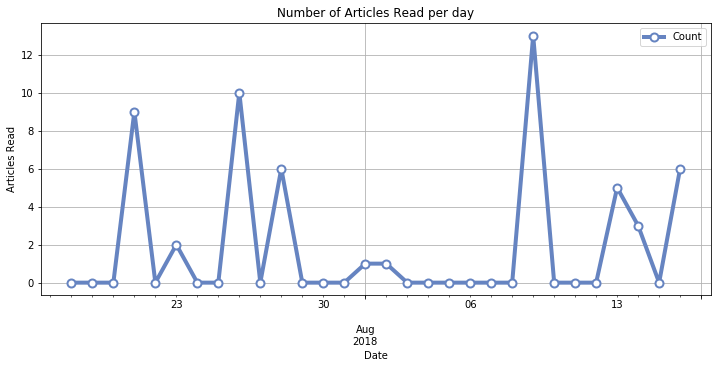

In [18]:
# a bit of a hackish solution, could use improvement
dataset = articles_read_dates.tail(30)
chart_title = 'Number of Articles Read per day'

#n_groups = len(dataset)
# index = np.arange(n_groups)

ax = dataset.plot(
    x="Date", y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
# ax.set_xticks(index)
ax.set_ylabel('Articles Read')
# ax.set_xlabel('')
# plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Analysis by Year

In [19]:
year_counts = articles_read['year'].value_counts().sort_index()
year_counts

2013    1863
2014    2398
2015     929
2016     157
2017       1
2018     732
Name: year, dtype: int64

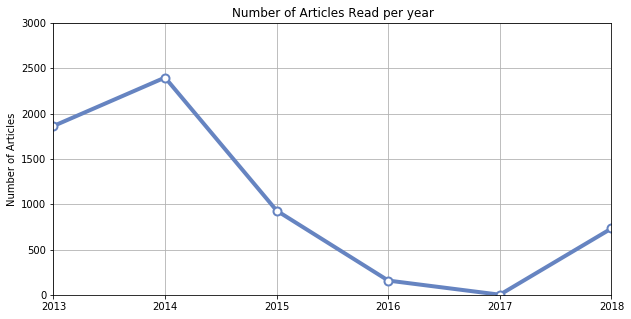

In [20]:
dataset = year_counts
chart_title = 'Number of Articles Read per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 3000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Articles')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

In [21]:
# yearly word count
year_word_counts = articles_read.groupby(['year'])['word_count'].sum()
year_word_counts = pd.DataFrame(year_word_counts)
# year_word_counts['Year'] = year_word_counts.index.values
year_word_counts['Word Count (in Books)'] = round((year_word_counts['word_count'] / 64000), 2)
year_word_counts.tail()

,word_count,Word Count (in Books)
year,,
2014,2485133.0,38.83
2015,880441.0,13.76
2016,206694.0,3.23
2017,1317.0,0.02
2018,1151020.0,17.98


-----

## Monthly Analysis: Articles Read

In [22]:
month_counts = articles_read['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Month', 'Count']

month_counts = pd.DataFrame(month_counts)
month_counts['Month'] = month_counts.index.values
month_counts.columns = ['Count', 'Month']
month_counts = month_counts[['Month', 'Count']]
month_counts['Month'] = pd.to_datetime(month_counts['Month'])
month_counts.tail()

,Month,Count
2018-04,2018-04-01,88
2018-05,2018-05-01,47
2018-06,2018-06-01,88
2018-07,2018-07-01,74
2018-08,2018-08-01,29


In [23]:
# Generage Range of Months from First Article read to Today
first_article_month = month_counts.head(1).index.values[0]
last_article_month = month_counts.tail(1).index.values[0]
# today = dt.today().strftime('%Y-%m-%d')
all_months = pd.date_range(start=first_article_month, end=last_article_month, freq='MS')
all_months = pd.DataFrame(all_months, columns=['Month'])

In [24]:
# count of date read
articles_read_per_day = articles_read['time_read_date'].value_counts().sort_index()
articles_read_per_day.columns = ['Date', 'Count']
articles_read_per_day = pd.DataFrame(articles_read_per_day)
articles_read_per_day['Date'] = articles_read_per_day.index.values
articles_read_per_day.columns = ['Count', 'Date']
articles_read_per_day = articles_read_per_day[['Date', 'Count']]
articles_read_per_day['Date'] = pd.to_datetime(articles_read_per_day['Date'])

In [25]:
# combine actual counts with total months 
total_months = pd.merge(left=all_months, right=month_counts, left_on="Month", right_on="Month", how="outer")
total_months['Count'].fillna(0, inplace=True)
total_months['Month Text'] = total_months['Month'].dt.strftime('%Y-%m')
# total_months.tail(20)
# len(total_months)

In [26]:
# maximum articles read in a month
max_per_month = total_months['Count'].max()
print('Most articles read in a month: {:,}'.format(max_per_month))

Most articles read in a month: 503.0


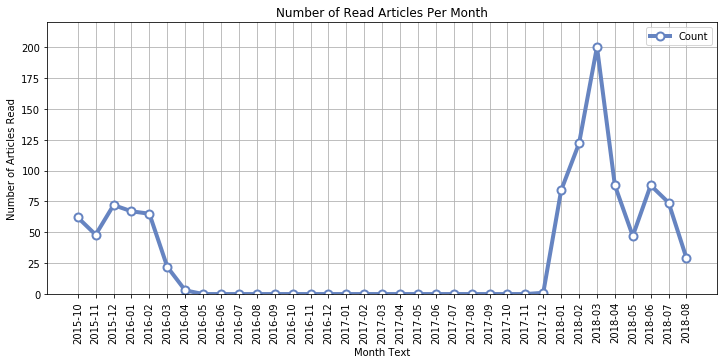

In [42]:
# a bit of a hackish solution, could use improvement
dataset = total_months.tail(35)
chart_title = 'Number of Read Articles Per Month'

n_groups = len(dataset)
index = np.arange(n_groups)

max_per_month = dataset['Count'].max()

ax = dataset.plot(
    x='Month Text', y='Count',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0,(max_per_month + 20))
# ax.set_xticks(index)
ax.set_ylabel('Number of Articles Read')
# ax.set_xlabel('')

# plt.xticks(rotation=90)
plt.xticks(index, dataset['Month Text'], rotation=90)
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis: Word Count of Articles Read

In [28]:
monthly_word_count = articles_read.groupby(['mnth_yr'])['word_count'].sum()
monthly_word_count = pd.DataFrame(monthly_word_count)
monthly_word_count['Month'] = monthly_word_count.index.values

In [29]:
monthly_word_count.columns = ['Word Count', 'Month']
monthly_word_count = monthly_word_count[['Month', 'Word Count']]
monthly_word_count['Month'] = pd.to_datetime(monthly_word_count['Month'])

In [30]:
total_months = pd.merge(left=total_months, right=monthly_word_count, left_on="Month", right_on="Month", how="outer")

In [31]:
# maximum articles read in a month
max_words_per_month = total_months['Word Count'].max()
print('Most Article Words read in a month: {:,}'.format(max_words_per_month))
print('or equal to about {:,} books'.format(round(max_words_per_month/64000, 2)))

Most Article Words read in a month: 524,869.0
or equal to about 8.2 books


In [32]:
total_months["Word Count (in Books)"] = round((total_months["Word Count"] / 64000), 2) 

In [33]:
total_months.tail()

,Month,Count,Month Text,Word Count,Word Count (in Books)
60,2018-04-01,88.0,2018-04,141840.0,2.22
61,2018-05-01,47.0,2018-05,84544.0,1.32
62,2018-06-01,88.0,2018-06,129235.0,2.02
63,2018-07-01,74.0,2018-07,111689.0,1.75
64,2018-08-01,29.0,2018-08,37514.0,0.59


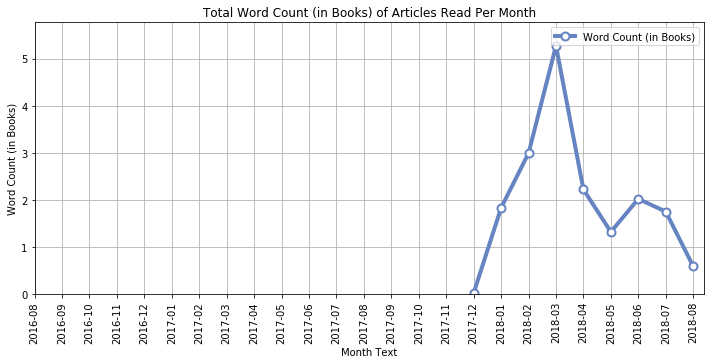

In [34]:
# a bit of a hackish solution, could use improvement
dataset = total_months.tail(25)
chart_title = 'Total Word Count (in Books) of Articles Read Per Month'

n_groups = len(dataset)
index = np.arange(n_groups)

max_per_month = dataset['Word Count (in Books)'].max()

ax = dataset.plot(
    x='Month Text', y='Word Count (in Books)',
    kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
    markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0,(max_per_month + 0.5))
# ax.set_xticks(index)
ax.set_ylabel('Word Count (in Books)')
# ax.set_xlabel('')

# plt.xticks(rotation=90)
plt.xticks(index, dataset['Month Text'], rotation=90)
ax.set_title(chart_title)

plt.show()

----

# Word Cloud of Given Title in Articles Read

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [36]:
stopwords = set(STOPWORDS)

In [37]:
# adjust accordingly
nsw = ["medium", "new", "york", "times", "NYTimes", "Forbes", "TED", "yorker", 
       "YouTube", "nan", "Wired", "Wikipedia", "free", "encyclopedia", "WikiTravel"] 
for i in nsw:
    stopwords.add(i)

In [38]:
words_in_title = ""

for index, row in articles_read.iterrows():
    if row["given_title"] != '':
        words_in_title =  words_in_title + " " + str(row["given_title"])

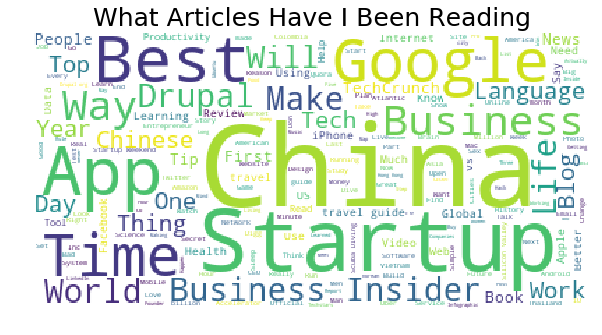

In [39]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_title)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Articles Have I Been Reading", fontsize=25)
plt.show()

----

# Words in Titles for a Single Year

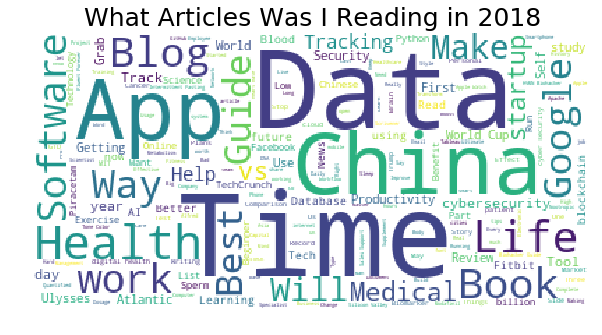

In [40]:
# Check For Single Year Only
check_year = 2018

words_in_title = ""

for index, row in articles_read[articles_read.year == check_year].iterrows():
    if row["given_title"] != '':
        words_in_title =  words_in_title + " " + str(row["given_title"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_title)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Articles Was I Reading in " + str(check_year), fontsize=25)
plt.show()

----

# Words in Titles for a Single Month

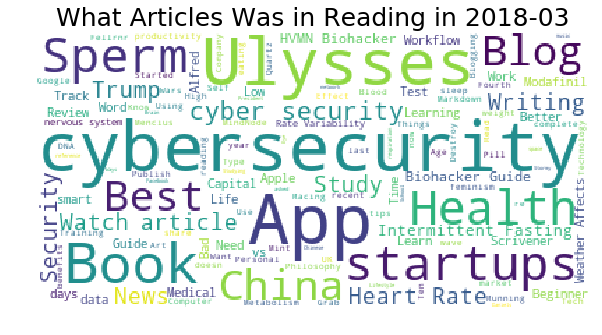

In [41]:
# Check For Single Year Only
check_month = "2018-03"

words_in_title = ""

for index, row in articles_read[articles_read.mnth_yr == check_month].iterrows():
    if row["given_title"] != '':
        words_in_title =  words_in_title + " " + str(row["given_title"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(words_in_title)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("What Articles Was in Reading in " + str(check_month), fontsize=25)
plt.show()